# Importing Libraries

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model
from keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


2024-01-19 12:03:19.817600: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 12:03:19.850483: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 12:03:19.850522: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 12:03:19.851914: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 12:03:19.858240: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 12:03:19.859022: I tensorflow/core/platform/cpu_feature_guard.cc:1

# Loading MNIST Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("--------------------Input Shape & Data Type --------------" ) 
print("X train shape : ", x_train.shape, "Data Type : " , type(x_train))
print("Y train shape : ", y_train.shape, "Data Type : ", type(y_train))
print("X test shape : ", x_test.shape, "Data Type : ", type(x_test))
print("Y test shape : ", y_test.shape, "Data Type : ", type(y_test))

--------------------Input Shape & Data Type --------------
X train shape :  (60000, 28, 28) Data Type :  <class 'numpy.ndarray'>
Y train shape :  (60000,) Data Type :  <class 'numpy.ndarray'>
X test shape :  (10000, 28, 28) Data Type :  <class 'numpy.ndarray'>
Y test shape :  (10000,) Data Type :  <class 'numpy.ndarray'>


# Ploating the Data Points --- Samples

In [4]:
def plot_input_img(i) : 
    plt.imshow(x_train[i], cmap = 'binary')
    plt.title(y_train[i])
    plt.show()

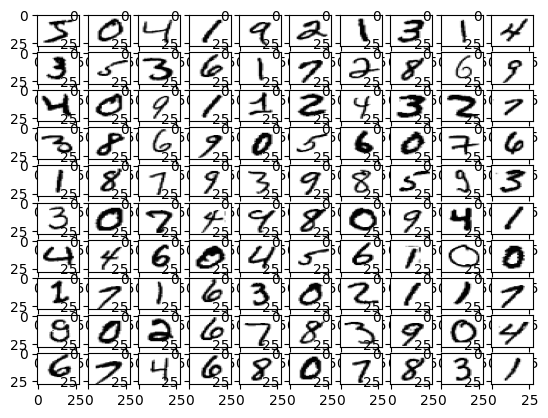

In [5]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), 
                        aspect='auto', cmap = 'binary')
        k += 1
plt.show()

# Preprocessing the data

In [6]:
# Preprocessing the data
# Normalizing the image
x_train = x_train.astype(np.float32)/255
x_train = x_train.reshape((60000, 784))
x_test = x_test.astype(np.float32)/255
x_test = x_test.reshape((10000, 784))

# Reshape / expand the dimension of images (28, 28, 1)
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)


# Converting the y to one hot vectors 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [7]:
print("--------------------Input Shape & Data Type --------------" ) 
print("X train shape : ", x_train.shape, "Data Type : " , type(x_train))
print("Y train shape : ", y_train.shape, "Data Type : ", type(y_train))
print("X test shape : ", x_test.shape, "Data Type : ", type(x_test))
print("Y test shape : ", y_test.shape, "Data Type : ", type(y_test))

--------------------Input Shape & Data Type --------------
X train shape :  (60000, 784) Data Type :  <class 'numpy.ndarray'>
Y train shape :  (60000, 10) Data Type :  <class 'numpy.ndarray'>
X test shape :  (10000, 784) Data Type :  <class 'numpy.ndarray'>
Y test shape :  (10000, 10) Data Type :  <class 'numpy.ndarray'>


# Keras - Implementing Multi-Layer Perceptron
Creating a MLP with one Layer of 10 neurons in hidden layer

In [8]:
hidden_layer_neurons = 10
input_dim = x_train.shape[1]
output_labels = 10

model = Sequential()
model.add(Dense(units= hidden_layer_neurons))
model.add(Activation(activation= 'sigmoid'))
model.add(Dense(output_labels))
model.add(Activation(activation='softmax'))

model.build(input_shape= (1, 784))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 10)                   7850      
                                                                 
 activation (Activation)     (1, 10)                   0         
                                                                 
 dense_1 (Dense)             (1, 10)                   110       
                                                                 
 activation_1 (Activation)   (1, 10)                   0         
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-01-19 12:03:26.845004: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-19 12:03:26.845732: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Parameters calculation for above 
For Weight matrix 1 = 
Input Shape = 784
Hidden Layer = 10

Weight Parameters 1= Input Shape * Hidden Layer + Bias * Hidden Layer

Next layer 
Hidden Layer = 10
Output Label = 10 

Weight Parameter 2 = Hidden Layer * Output Label + Bias * Output Label


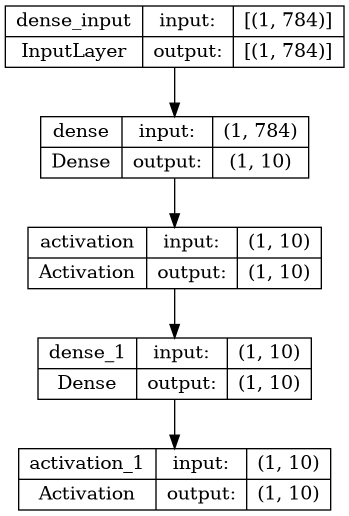

In [9]:
plot_model(model, show_shapes= True)

# Compile Model



In [10]:
model.compile(
    loss = 'categorical_crossentropy',  
    optimizer= 'sgd', 
    metrics= ['accuracy']
)

# Training Model with fit() method

In [11]:
model.fit(x= x_train, y= y_train, epochs= 10)

Epoch 1/10


2024-01-19 12:03:27.017593: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 1s 669us/step - loss: 1.8914 - accuracy: 0.5016
Epoch 2/10
1875/1875 [==============================] - 1s 707us/step - loss: 1.2748 - accuracy: 0.7402
Epoch 3/10
1875/1875 [==============================] - 1s 681us/step - loss: 0.9674 - accuracy: 0.7972
Epoch 4/10
1875/1875 [==============================] - 1s 637us/step - loss: 0.8013 - accuracy: 0.8288
Epoch 5/10
1875/1875 [==============================] - 1s 629us/step - loss: 0.6926 - accuracy: 0.8482
Epoch 6/10
1875/1875 [==============================] - 1s 628us/step - loss: 0.6155 - accuracy: 0.8613
Epoch 7/10
1875/1875 [==============================] - 1s 630us/step - loss: 0.5594 - accuracy: 0.8714
Epoch 8/10
1875/1875 [==============================] - 1s 613us/step - loss: 0.5177 - accuracy: 0.8777
Epoch 9/10
1875/1875 [==============================] - 1s 615us/step - loss: 0.4858 - accuracy: 0.8831
Epoch 10/10
1875/1875 [==============================] - 1s 618us/step - lo

# Evaluating model performance with evaluate() method 

In [12]:
loss, accuracy = model.evaluate(x= x_test, y= y_test)
print("Accuracy : ", accuracy * 100)
print(" Loss : ", loss)

313/313 [==============================] - 0s 543us/step - loss: 0.4389 - accuracy: 0.8944
Accuracy :  89.44000005722046
 Loss :  0.4389214813709259


# Confusion Matrix

In [13]:
y_pred = model.predict(x= x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)

313/313 [==============================] - 0s 479us/step
[[ 944    0    3    6    0    8   11    2    6    0]
 [   0 1103    5    4    0    0    3    2   18    0]
 [  20    8  889   28   16    0   18   17   31    5]
 [   9    1   29  900    1   23    1   20   20    6]
 [   0    5    4    0  898    1   18    1    3   52]
 [  14    3   17   70   23  692   13   11   46    3]
 [  22    3   15    0   10   14  891    0    3    0]
 [   4   25   22    3   12    1    0  930    3   28]
 [   7   18   19   29   17   28    5   18  815   18]
 [   8    4    1   12   55   16    7   17    7  882]]


# Saving Model

In [14]:
file_name = 'MLP_1HiddenLayer_SGD.keras'
model.save(file_name)

# Reloading Model 

In [15]:
reload_model = load_model('mlp.keras')
reload_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Restored Model Accuracy 
loss, accuracy = reload_model.evaluate(x= x_test, y= y_test)
print("Accuracy : ", accuracy * 100)
print(" Loss : ", loss)

313/313 [==============================] - 0s 561us/step - loss: 0.4019 - accuracy: 0.8987
Accuracy :  89.86999988555908
 Loss :  0.40192773938179016
